In [3]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from matplotlib.backends.backend_pdf import PdfPages

In [464]:
files = glob.glob('/home/weiran/ltcl/ablations/toy_nonlinear_ts_trans_*.csv')

In [465]:
print(files)

['/home/weiran/ltcl/ablations/toy_nonlinear_ts_trans_v2.csv']


In [466]:
results = [ ]
for f in files:
    results.append(pd.read_csv(f)['Value'].max())
print(np.mean(results), np.std(results))

0.9838135838508606 0.0


In [279]:
files = glob.glob('/home/weiran/ltcl/baselines/toy_linear_ts_fvae_v*')
print(files)

['/home/weiran/ltcl/baselines/toy_linear_ts_fvae_v0.csv', '/home/weiran/ltcl/baselines/toy_linear_ts_fvae_v1.csv']


In [7]:
from scipy import interpolate

In [388]:
PATHS = ['/home/weiran/ltcl/baselines/toy_linear_ts_v*',
         '/home/weiran/ltcl/baselines/toy_linear_ts_beta_v*',
         '/home/weiran/ltcl/baselines/toy_linear_ts_fvae_v*',
         '/home/weiran/ltcl/baselines/toy_linear_ts_pcl_v*',
         '/home/weiran/ltcl/baselines/toy_linear_ts_svae_v*']
colors =  ['gold', 'black', 'gray', 'navy', 'blue']
labels = ['LEAP', 'BetaVAE', 'FactorVAE', 'PCL', 'SlowVAE']

In [33]:
PATHS = ['/home/weiran/ltcl/towards/linear_changeable_causal/*.csv',
         '/home/weiran/ltcl/towards/linear_instan/*.csv']
colors =  ['green', 'red']
labels = ['Changing relations', 'Instantaneous relations']

In [34]:
figure_path = '/home/weiran/figs/'

/tmp/ipykernel_1324/2939418375.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(xlabels)


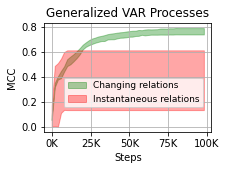

In [57]:
with PdfPages(figure_path + '/towards.pdf') as pdf:
    interval = 2000
    steps = 100_000
    x_interp = np.arange(0, steps, interval)
    fig, axes = plt.subplots(1,1, figsize=(3,2))
    for i, path in enumerate(PATHS):
        files = glob.glob(path)
        results = [ ]
        for f in files:
            df = pd.read_csv(f)
            x = df['Step'].values
            y = df['Value'].values
            xnew = np.arange(0,x[-1], interval)
            f = interpolate.interp1d(x, y, fill_value='extrapolate')  
            ynew = f(xnew)
            if len(ynew) < len(x_interp):
                y_clip = list(ynew) + [ynew[-1]] * (len(x_interp)-len(ynew))
            else:
                y_clip = ynew[:len(x_interp)]
            results.append(y_clip)
        results = np.stack(results)
        results = np.clip(results, a_max=1, a_min=0)    
        axes.fill_between(x_interp, 
                          np.mean(results, axis=0)-np.std(results, axis=0), 
                          np.mean(results, axis=0)+np.std(results, axis=0), 
                          color=colors[i], alpha=.35, label=labels[i])

    xlabels = ['{:,.0f}'.format(x) + 'K' for x in axes.get_xticks()/1000]
    axes.set_xticklabels(xlabels)
    axes.set_xlabel('Steps')
    axes.set_ylabel('MCC')
    axes.set_title('Generalized VAR Processes')
    axes.legend(loc=[0.12,0.225], fontsize=9)
    axes.grid(':')
    
    pdf.savefig(fig, bbox_inches="tight")


In [10]:
PATHS = ['/home/weiran/ltcl/baselines/toy_nonlinear_ts_v[0-9][0-9].csv',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_var_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_beta_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_fvae_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_ivae_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_tcl_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_pcl_v*',
         '/home/weiran/ltcl/baselines/toy_nonlinear_ts_svae_v*']
colors =  ['gold','green', 'black', 'gray', 'red', 'orange', 'navy', 'blue']
labels = ['LEAP', 'LEAP-VAR','BetaVAE', 'FactorVAE', 'IVAE', 'TCL', 'PCL', 'SlowVAE']

/tmp/ipykernel_31657/2205402445.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(xlabels)


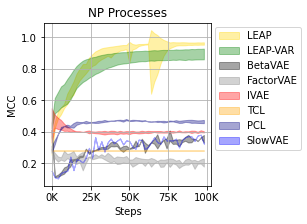

In [457]:
with PdfPages(figure_path + '/np_traj.pdf') as pdf:

    interval = 2000
    steps = 100_000
    x_interp = np.arange(0, steps, interval)
    fig, axes = plt.subplots(1,1, figsize=(3,3))
    for i, path in enumerate(PATHS):
        files = glob.glob(path)
        results = [ ]
        for f in files:
            df = pd.read_csv(f)
            x = df['Step'].values
            y = df['Value'].values
            xnew = np.arange(0,x[-1], interval)
            f = interpolate.interp1d(x, y, fill_value='extrapolate')  
            ynew = f(xnew)
            if len(ynew) < len(x_interp):
                y_clip = list(ynew) + [ynew[-1]] * (len(x_interp)-len(ynew))
            else:
                y_clip = ynew[:len(x_interp)]
            results.append(y_clip)
        results = np.stack(results)
        results = np.clip(results, a_max=1, a_min=0)    
        axes.fill_between(x_interp, 
                          np.mean(results, axis=0)-np.std(results, axis=0), 
                          np.mean(results, axis=0)+np.std(results, axis=0), 
                          color=colors[i], alpha=.35, label=labels[i])

    xlabels = ['{:,.0f}'.format(x) + 'K' for x in axes.get_xticks()/1000]
    axes.set_xticklabels(xlabels)
    axes.set_xlabel('Steps')
    axes.set_ylabel('MCC')
    axes.set_title('NP Processes')
    axes.legend(loc=[1.02,0.22], fontsize=10)
    axes.grid(':')
    pdf.savefig(fig, bbox_inches="tight")